In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [3]:
FIG_SIZE = (15,10)

file = "data/blues.00000.wav"

In [4]:
signal, sample_rate = librosa.load(file, sr=22050)

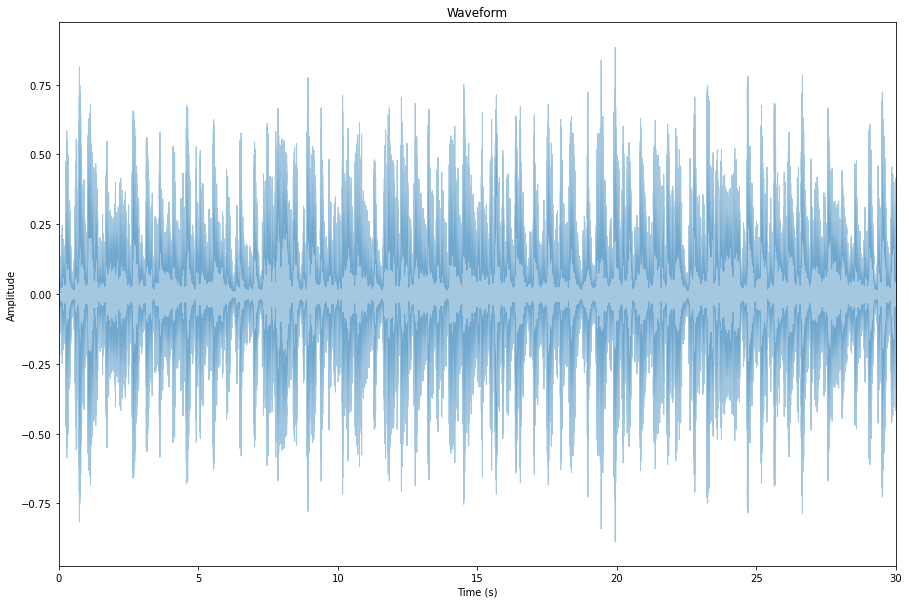

In [6]:
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
#plt.savefig('figures/waveform.jpg', dpi=150)

#### waveform is esentially a plot of Amplitude as a function of time. Let's now try to visualize this data by expressing magnitudes as a function of frequency, which would indicate contribution of each frequency to the entire sound. 
(This is the part where theoretical physics nerds get excited as they finally get to use fourier analysis in scenarios which are actually relevant)

In [7]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

In [8]:
# calculating absolute values on complex numbers to get magnitude
spectrum = np.abs(fft)

In [9]:
# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power spectrum')

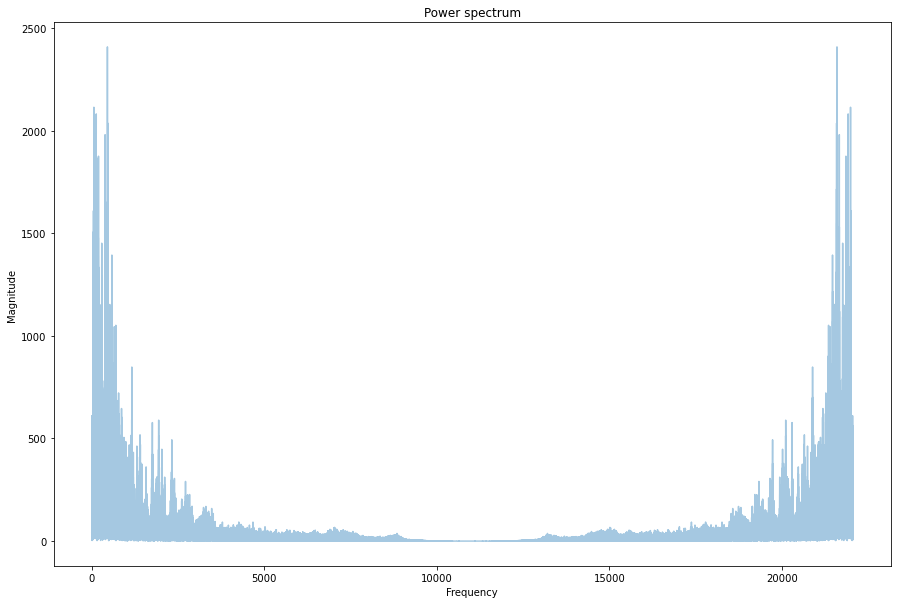

In [10]:
# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

#### since the plot is symmetrical let's just focus on the first half:

Text(0.5, 1.0, 'Power Spectrum')

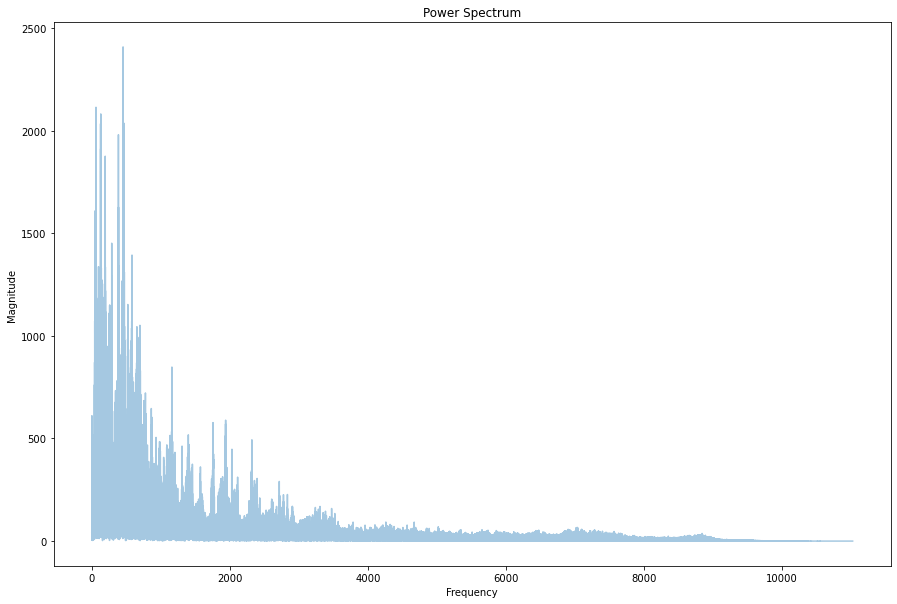

In [12]:
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")
#plt.savefig('figures/Power_Spectrum.jpg', dpi=150)

#### The problem with ordinary fast fourier transform is that it is static, meaning that it does not encode evolution of frequency distribution over time. To understand how these frequencies are contributing to the overall sound throughout time, short-time fourier transform should be used (stft) expressed as a spectogram. Spectogram should give us information about magnitude as a function of both frequency and time. Instead of introducing a third dimension, magnitude will be encoded in color.

In [13]:
n_fft = 2048 # in num. of samples

# Fourier transform will be performed on 2048 individual chuncks of data

In [14]:
hop_length = 512 # window in num. of samples

# Interval from one fft to the subsequent one

In [15]:
# calculating duration of hop length and window in seconds

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


In [16]:
# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

Text(0.5, 1.0, 'Spectrogram')

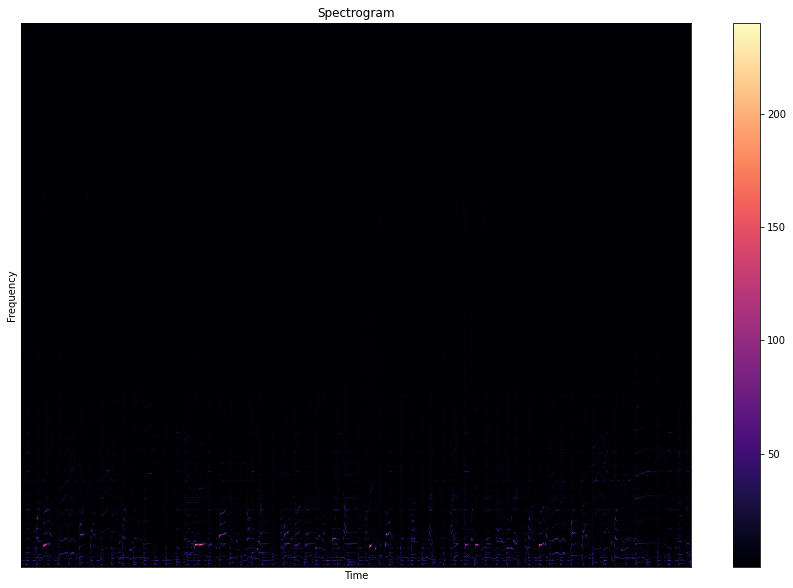

In [17]:
# calculating absolute values of complex numbers to get magnitude
spectrogram = np.abs(stft)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

#### Most of the frequencies seem to have low magnitudes, which is why pretty much the entire spectrogram is blacked-out. what we could do to fix it is changing the scale to logarithmic, thus converting magnitudes to decibels, which is how humans perceive it

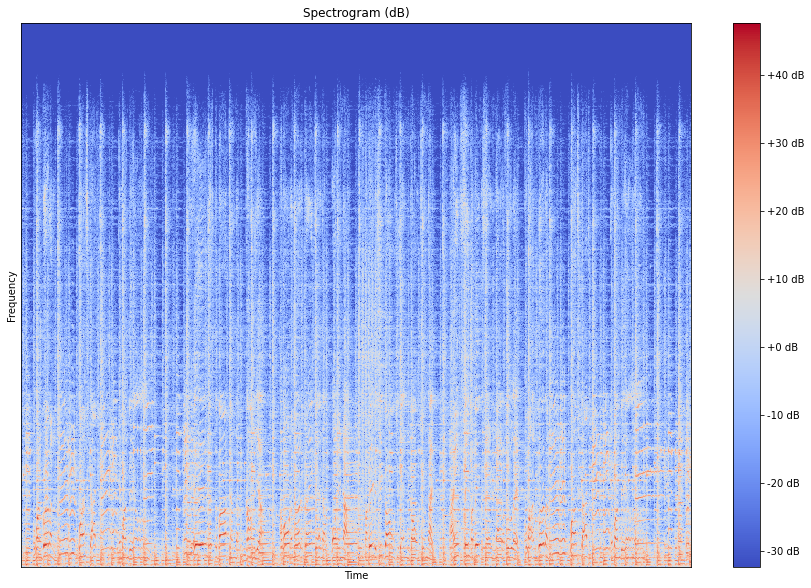

In [19]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
#plt.savefig('figures/Spectrogram_dB.jpg', dpi=150)

### Mel-Frequency Cepstral Coefficients

Mfcc's are even more significant than STFFT spectograms, as they manage to capture textual aspects of sound and relate to human auditory system

In [20]:
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

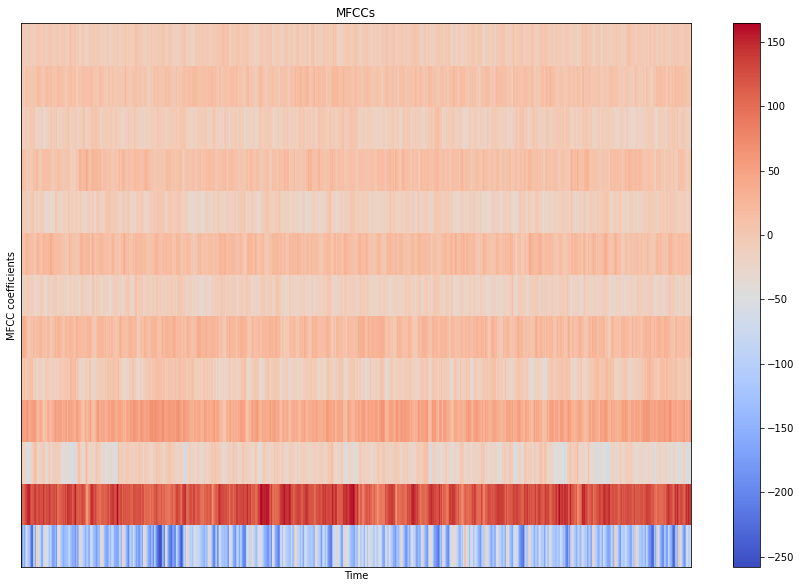

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()
#plt.savefig('figures/Mel_Frequency_Cepstrum.jpg', dpi=150)